In [2]:

import sys
import os
sys.path.insert(1, os.path.join(os.path.expanduser('~/.local/lib/python2.7/site-packages/')))
import matplotlib
print(matplotlib.__version__)


print(matplotlib.__version__)


import glob, os
import pandas as pd
import csv
import dateutil.parser
get_ipython().magic(u'matplotlib inline')
import matplotlib
import datetime
import calendar
import calendar
import numpy as np
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

1.4.3
1.4.3


In [3]:
# Part 1

data_path = "data/"
allFiles = [file for file in glob.glob(data_path+"*.txt")]

df_list=[pd.read_csv(f) for f in allFiles]
traffic=pd.concat(df_list)

traffic.head()

traffic.rename(columns=lambda x: x.strip(),inplace=True)





In [5]:
traffic['date_time'] = pd.to_datetime(traffic.DATE + ' ' + traffic.TIME)
traffic['date_parsed'] = pd.to_datetime(traffic.DATE)

In [6]:
traffic.sort(['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','date_time'],inplace =True)


traffic['key']= tuple(zip(traffic['C/A'],traffic['UNIT'],traffic['SCP'],traffic['STATION']))


traffic['shifted_entries']=traffic['ENTRIES'].shift(periods=1) 
traffic['shifted_exits']=traffic['EXITS'].shift(periods=1) 
traffic['shifted_key']=traffic['key'].shift(periods=1) 


traffic['ENTRIESn_hourly'] = np.where(traffic['shifted_key']==traffic['key'],traffic['ENTRIES']-traffic['shifted_entries'],0)
traffic['EXITSn_hourly'] = np.where(traffic['shifted_key']==traffic['key'],traffic['EXITS']-traffic['shifted_exits'],0)

min_bad_value=0
max_bad_value=5000

bad_values=traffic[(traffic.ENTRIESn_hourly<min_bad_value) | (traffic.ENTRIESn_hourly>max_bad_value)]
good_values=traffic[(traffic.ENTRIESn_hourly>=min_bad_value) & (traffic.ENTRIESn_hourly<=max_bad_value)]
print ("There are %s bad values and %s good values"%(len(bad_values),len(good_values)))

traffic.drop(['shifted_entries','shifted_exits','shifted_key'],inplace=True,axis=1)
traffic=good_values

earliest_may_date=datetime.date(2015,5,1)
latest_may_date=datetime.date(2015,5,30)
may_df=traffic[(traffic.date_parsed >= earliest_may_date) & (traffic.date_parsed <= latest_may_date)]
print ("There were %s entries"%(len(traffic)))
print ("There are %s entries in month of may. So we lost %s entires"%(len(may_df) , len(traffic)-len(may_df)))



There are 5430 bad values and 955420 good values
There were 955420 entries
There are 791421 entries in month of may. So we lost 163999 entires


In [9]:
#total_entries=traffic[['STATION','ENTRIESn_hourly', 'UNIT']].groupby(['STATION']).agg({'ENTRIESn_hourly':np.sum})
total_entries = traffic.groupby(['STATION', 'UNIT'], as_index=False).sum()
total_entries=total_entries.reset_index()


#total_entries=total_entries.sort('ENTRIESn_hourly',ascending=False)
#total_entries.rename(columns={'ENTRIESn_hourly':'entries'}, inplace=True)


total_entries

,index,STATION,UNIT,ENTRIES,EXITS,shifted_entries,shifted_exits,ENTRIESn_hourly,EXITSn_hourly
0,0,1 AVE,R248,100707946629,103853564135,1.016458e+11,1.048439e+11,605504,630596
1,1,103 ST,R180,7655926260,8851975478,7.665213e+09,8.830369e+09,328913,381766
2,2,103 ST,R191,12830036745,6613045442,1.282153e+10,6.604838e+09,410445,190973
3,3,103 ST,R314,5031373781,4545821450,5.031728e+09,4.546871e+09,155875,113023
4,4,103 ST-CORONA,R208,13954938857,12701497389,1.395223e+10,1.269631e+10,644568,513418
5,5,104 ST,R007,4254195056,2738311236,4.250869e+09,2.734039e+09,72883,49232
6,6,110 ST,R181,6532334448,5980058317,6.528289e+09,5.999947e+09,439688,330337
7,7,110 ST-CATHEDRL,R192,8587182156,3260867933,8.586827e+09,3.260336e+09,429005,217985
8,8,110 ST-CPN,R323,80404217995,75478631962,8.109450e+10,7.622987e+10,332971,275352
9,9,111 ST,R008,3039353452,2852578832,3.037591e+09,2.852429e+09,84991,49749


In [7]:
# Part 2

data_path = "data_commuter/"
allFiles = [file for file in glob.glob(data_path+"*.csv")]
df_list=[pd.read_csv(f, header = 2) for f in allFiles]
df=pd.concat(df_list)
df.rename(columns=lambda x: x.strip(),inplace=True)

df['30_TOT'] = df['30-D AFAS/RMF UNL'] + df['30-D UNL']
df = df.rename(columns={'REMOTE': 'UNIT'})
df = df[['UNIT', 'STATION','30_TOT', 'FF']]


df.sort(['STATION'], inplace=True)
gb = df.groupby(['STATION', 'UNIT'], as_index = False).sum()
gb['RATIO'] = gb['30_TOT'] / gb['FF']
#gb.sort(['RATIO'], ascending=False, inplace=True)
print gb.sort('STATION')

                            STATION  UNIT  30_TOT      FF     RATIO
0    103RD ST-CENTRAL PARK WEST      R314   41432   38744  1.069378
1    103RD ST-ROOSEVELT AVE          R208   81050  186585  0.434386
2    103RD STREET-BROADWAY           R191   97148   91184  1.065406
3    103RD STREET-LEXINGTON AVE      R180   76464  104134  0.734285
4    104TH STREET                    R007   12885   27475  0.468972
5    104TH STREET-LIBERTY AVENUE     R354    7996   17979  0.444741
6    109TH STREET-LIBERTY AVENUE     R355   13479   27477  0.490556
7    110TH STREET-8TH AVENUE         R334   67880   60706  1.118176
8    110TH STREET-BROADWAY           R192  105268  108289  0.972102
9    110TH STREET-LEXINGTON AVE      R181   89958   96444  0.932749
10   111TH STREET                    R008   11648   23941  0.486529
11   111TH STREET-LENOX AVENUE       R323   76326   70790  1.078203
12   111TH STREET-ROOSEVELT AVE      R310   53078  113451  0.467850
13   116TH STREET-8TH AVENUE         R333   6056

In [68]:
results = pd.merge(gb, total_entries, on =['UNIT'])

In [69]:
results = results[['STATION_x', 'UNIT', 'RATIO', 'ENTRIESn_hourly']]

In [70]:
results.sort(['ENTRIESn_hourly'], ascending=False)
#results['ENTRIESn_hourly'] = results['ENTRIESn_hourly']/1000

,STATION_x,UNIT,RATIO,ENTRIESn_hourly
36,14TH STREET-UNION SQUARE,R170,0.911575,3481272
140,59TH STREET/COLUMBUS CIRCLE,R084,0.747138,2380191
99,34TH STREET & 6TH AVENUE,R022,0.715801,2323965
116,42ND STREET & GRAND CENTRAL,R046,0.486714,2245888
168,86TH STREET-LEXINGTON AVE,R179,0.913576,2112838
119,42ND STREET/TIMES SQUARE,R033,0.507095,2046352
102,34TH STREET & 8TH AVENUE,R012,0.363240,2014197
353,MAIN STREET,R055,1.298297,1904093
123,47-50 STREETS/ROCKEFELLER,R020,0.678011,1733642
114,42ND STREET & 8TH AVENUE,R011,0.316553,1715346


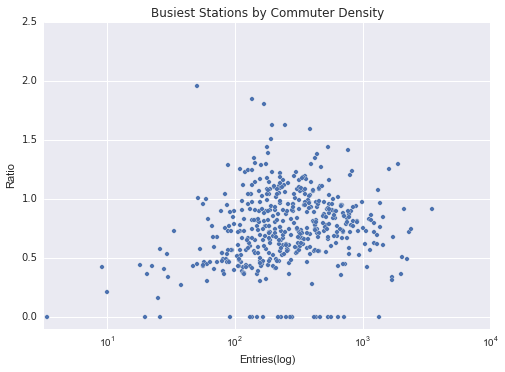

In [65]:
results.plot(kind='scatter', y='RATIO', x='ENTRIESn_hourly', logx=True, xlim = 0, ylim=-.1)
plt.title("Busiest Stations by Commuter Density")
plt.xlabel('Entries(log)')
plt.ylabel('Ratio')

In [43]:
print results

                          STATION_x  UNIT     RATIO  ENTRIESn_hourly  \
0    103RD ST-CENTRAL PARK WEST      R314  1.069378     1.558750e-07   
1    103RD ST-ROOSEVELT AVE          R208  0.434386     6.445680e-07   
2    103RD STREET-BROADWAY           R191  1.065406     4.104450e-07   
3    103RD STREET-LEXINGTON AVE      R180  0.734285     3.289130e-07   
4    104TH STREET                    R007  0.468972     7.288300e-08   
5    104TH STREET-LIBERTY AVENUE     R354  0.444741     5.025100e-08   
6    109TH STREET-LIBERTY AVENUE     R355  0.490556     8.022600e-08   
7    110TH STREET-8TH AVENUE         R334  1.118176     2.430410e-07   
8    110TH STREET-BROADWAY           R192  0.972102     4.290050e-07   
9    110TH STREET-LEXINGTON AVE      R181  0.932749     4.396880e-07   
10   111TH STREET                    R008  0.486529     8.499100e-08   
11   111TH STREET-LENOX AVENUE       R323  1.078203     3.329710e-07   
12   111TH STREET-ROOSEVELT AVE      R310  0.467850     3.691170

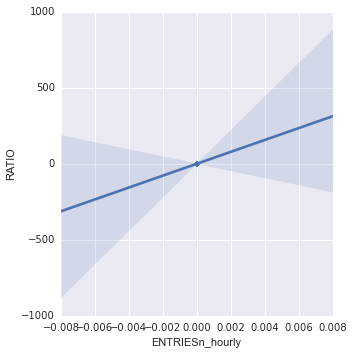

In [31]:
sns.lmplot("ENTRIESn_hourly", "RATIO", results)

In [30]:
print results['ENTRIESn_hourly']

0      1.558750e-07
1      6.445680e-07
2      4.104450e-07
3      3.289130e-07
4      7.288300e-08
5      5.025100e-08
6      8.022600e-08
7      2.430410e-07
8      4.290050e-07
9      4.396880e-07
10     8.499100e-08
11     3.329710e-07
12     3.691170e-07
13     2.275990e-07
14     4.424620e-07
15     4.100390e-07
16     5.280600e-07
17     7.943500e-08
18     9.832520e-07
19     2.530910e-07
20     4.520960e-07
21     8.074360e-07
22     5.011120e-07
23     1.771700e-07
24     4.642560e-07
25     1.064260e-07
26     2.552410e-07
27     7.989980e-07
28     3.525220e-07
29     1.144570e-07
           ...     
452    1.524550e-07
453    7.899470e-07
454    1.518880e-07
455    2.415030e-07
456    2.491700e-08
457    3.130720e-07
458    2.076640e-07
459    8.313760e-07
460    5.179310e-07
461    9.030640e-07
462    1.063800e-07
463    9.853600e-08
464    1.514440e-07
465    1.582920e-07
466    7.531010e-07
467    6.694200e-07
468    1.444440e-06
469    7.950800e-08
470    2.092600e-07


In [46]:
name = 'Penn'
plt.scatter(results['ENTRIESn_hourly'] / 1e4, results['RATIO'])
plt.title('Traffic vs. Commuters')
plt.xlabel('Entries(in )')
plt.ylabel('Ratio')

plt.grid()
plt.annotate(name, 
        xy = (results['ENTRIESn_hourly'][results['STATION_x'] == name ] / 1e4,  results['RATIO'][results['STATION_x'] == name]), 
        xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', facecolor = 'black' , connectionstyle = 'arc3,rad=0'))
plt.show()

TypeError: cannot convert the series to <type 'float'>

In [72]:
results[(results.ENTRIESn_hourly > 1500000) & (results.RATIO > 1.0)]

,STATION_x,UNIT,RATIO,ENTRIESn_hourly
353,MAIN STREET,R055,1.298297,1904093
434,ROOSEVELT AVE/JACKSON HTS,R018,1.248797,1603067
